# Topic : Modeling Pipeline Optimization With scikit-learn
*Reference*
* https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

In [128]:
import pandas as pd
from numpy import ravel
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## To load  the dataset

In [129]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', sep = '\s+', header=None)
# df = pd.read_csv('ecoli.data', sep = '\s+', header=None)

In [130]:
df.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [131]:
df[8].unique()

array(['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp'], dtype=object)

## To define input and output variables 

In [132]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

## To encode output (target) variables 

In [133]:
encoder = LabelEncoder()
y_encoder = encoder.fit_transform(ravel(y))

In [134]:
y_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoder, test_size=1/3, random_state=0)

In [136]:
print (X_train.shape)
print (X_test.shape)

(224, 7)
(112, 7)


## KNeighbors

In [137]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [138]:
print ("Train Score", str(knn.score(X_train, y_train)))
print ("Test Score", str(knn.score(X_test, y_test)))

Train Score 0.9017857142857143
Test Score 0.8482142857142857


## with Pipeline

In [139]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold()),
    ('classifier', KNeighborsClassifier())
])

In [140]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

In [141]:
print ("Train Score", str(pipe.score(X_train, y_train)))
print ("Test Score", str(pipe.score(X_test, y_test)))

Train Score 0.8794642857142857
Test Score 0.8392857142857143


In [142]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), 
                         Normalizer(), MaxAbsScaler()],
              'selector__threshold':[0, 0.001, 0.01],
              'classifier__n_neighbors':[1, 3, 5, 7, 10],
              'classifier__p':[1, 2],
              'classifier__leaf_size':[1, 5, 10, 15]
}

In [143]:
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

/home/narut/anaconda3/envs/sparkenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


In [144]:
print('Train score: ' + str(grid.score(X_train, y_train)))
print('Test score: ' + str(grid.score(X_test, y_test)))

Train score: 0.8928571428571429
Test score: 0.8571428571428571


## Best Param

In [145]:
best_params = grid.best_params_
print (best_params)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}


## Store optimum model in best_pipe

In [146]:
best_pipe = grid.best_estimator_
print (best_pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])


In [147]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print (result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


## To visulize the results

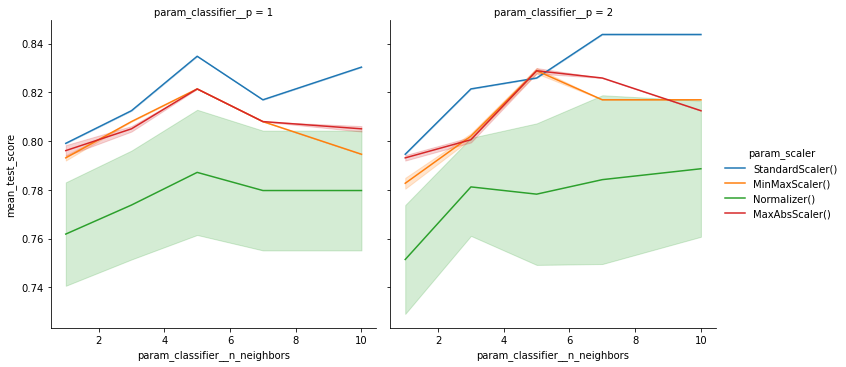

In [148]:
sns.relplot(data=result_df,
           kind='line',
           x='param_classifier__n_neighbors',
           y='mean_test_score',
           hue='param_scaler',
           col='param_classifier__p')
plt.show()

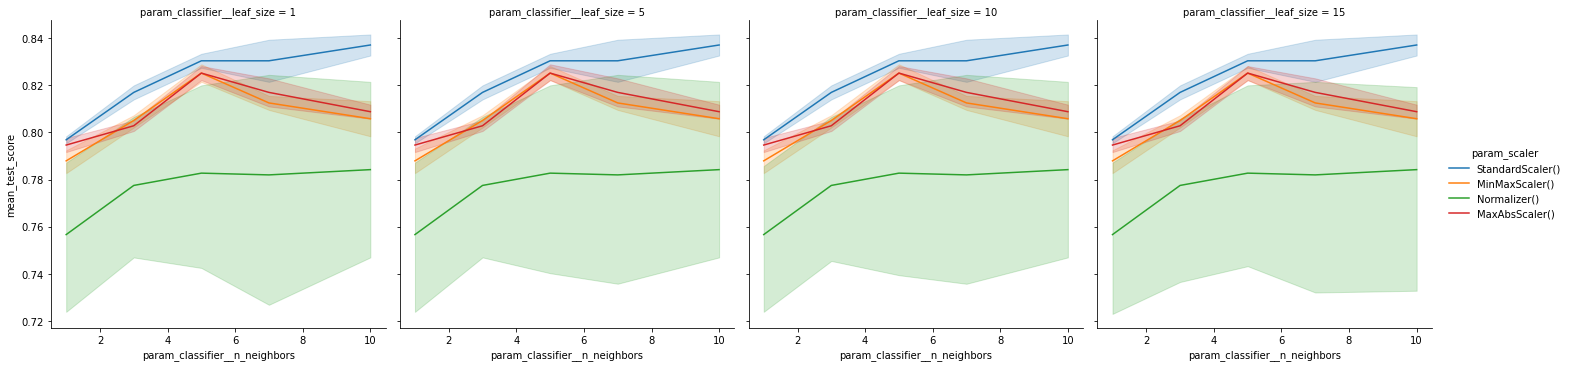

In [150]:
sns.relplot(data=result_df,
           kind='line',
           x='param_classifier__n_neighbors',
           y='mean_test_score',
           hue='param_scaler',
           col='param_classifier__leaf_size')
plt.show()